#**Eda Notebook**

--- 1. Loading mock data from CSV files ---
All datasets loaded successfully.

--- 2. Preparing and merging data ---
Data preparation and merging completed.

--- 3. Performing EDA and creating visualizations ---


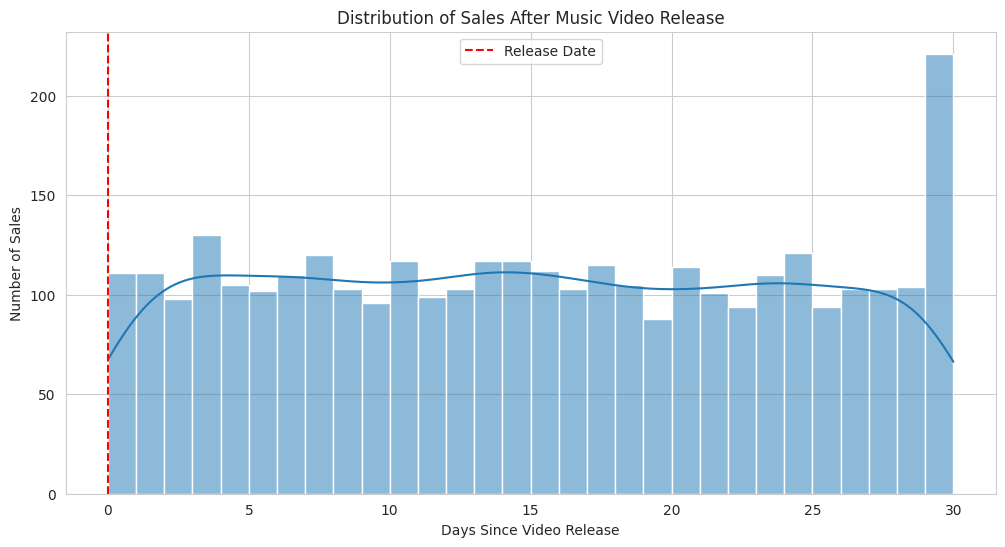

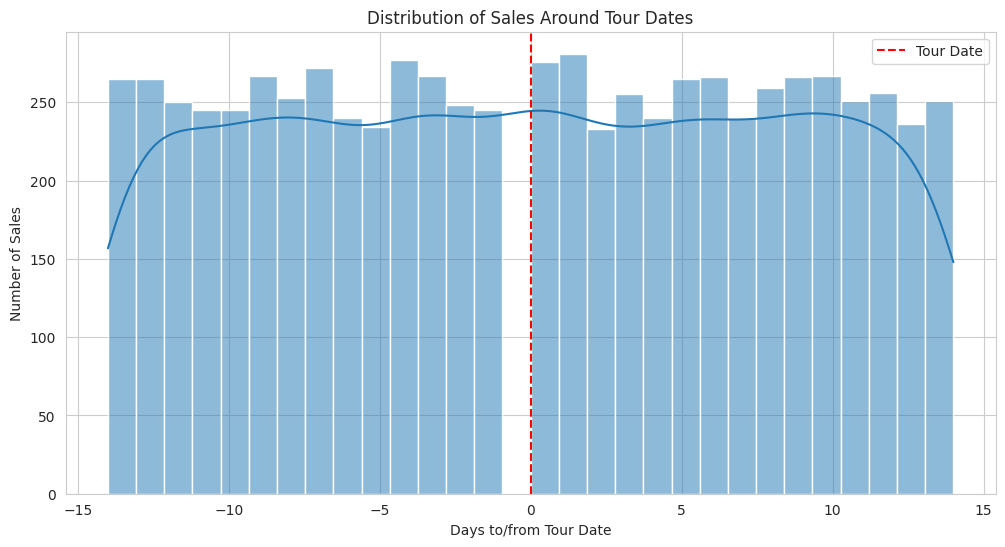

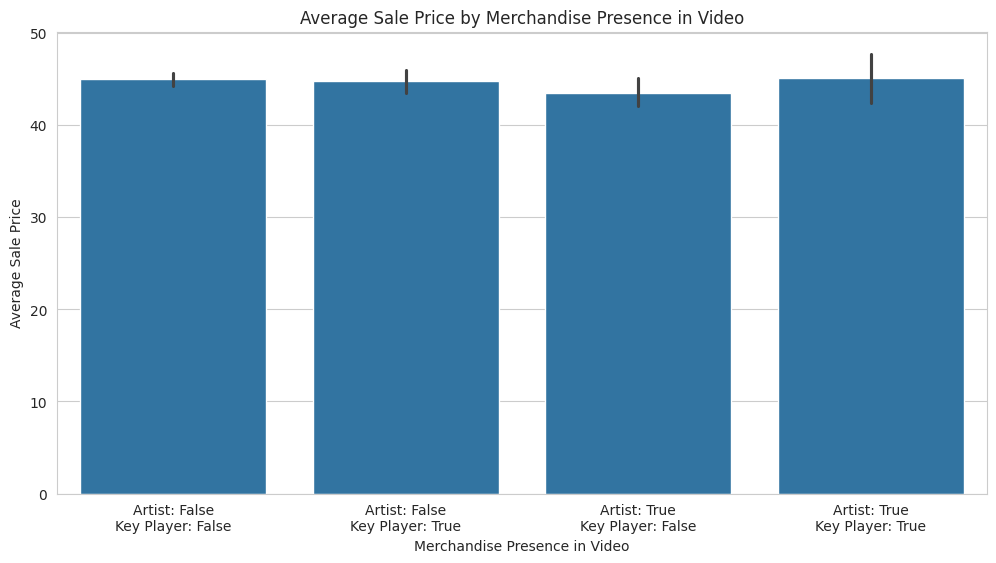


--- 4. Key Insights from EDA ---
Total sales in the dataset: 15000
Top 5 artists by total revenue:
artist_id
ARTIST_007    15635.85
ARTIST_049    15525.90
ARTIST_045    15462.58
ARTIST_020    14873.72
ARTIST_046    14668.63
Name: sale_price, dtype: float64

EDA completed. The prepared data and visualizations will be used for the next phases of the project.


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# --- 1. Load Mock Data ---
print("--- 1. Loading mock data from CSV files ---")
try:
    music_videos_df = pd.read_csv('music_videos.csv', parse_dates=['release_date'])
    merchandise_sales_df = pd.read_csv('merchandise_sales.csv', parse_dates=['sale_date'])
    fan_engagement_df = pd.read_csv('fan_engagement.csv', parse_dates=['engagement_date'])
    tour_dates_df = pd.read_csv('tour_dates.csv', parse_dates=['tour_date'])
    print("All datasets loaded successfully.")

    # --- 2. Data Preparation and Merging ---
    print("\n--- 2. Preparing and merging data ---")

    # Merge sales with video data to analyze sales post-release
    sales_with_video_df = pd.merge(merchandise_sales_df, music_videos_df, on='artist_id', how='left', suffixes=('_sale', '_video'))
    sales_with_video_df['days_since_release'] = (sales_with_video_df['sale_date'] - sales_with_video_df['release_date']).dt.days
    sales_after_release_df = sales_with_video_df[(sales_with_video_df['days_since_release'] >= 0) & (sales_with_video_df['days_since_release'] <= 30)].copy()

    # Merge sales with tour data to analyze sales around tour dates
    sales_with_tour_df = pd.merge(merchandise_sales_df, tour_dates_df, on='artist_id', how='left', suffixes=('_sale', '_tour'))
    sales_with_tour_df['days_to_tour'] = (sales_with_tour_df['sale_date'] - sales_with_tour_df['tour_date']).dt.days
    sales_around_tour_df = sales_with_tour_df[(sales_with_tour_df['days_to_tour'] >= -14) & (sales_with_tour_df['days_to_tour'] <= 14)].copy()

    # Merge all datasets into a single master dataframe for comprehensive analysis
    sales_and_video_data = pd.merge(merchandise_sales_df, music_videos_df, on='artist_id', how='left', suffixes=('_sale', '_video'))
    sales_and_video_data['days_since_release'] = (sales_and_video_data['sale_date'] - sales_and_video_data['release_date']).dt.days

    sales_and_tour_data = pd.merge(merchandise_sales_df, tour_dates_df, on='artist_id', how='left', suffixes=('_sale', '_tour'))
    sales_and_tour_data['days_to_tour'] = (sales_and_tour_data['sale_date'] - sales_and_tour_data['tour_date']).dt.days

    master_df = pd.merge(sales_and_video_data, fan_engagement_df, on=['user_id', 'artist_id'], how='left')
    master_df = pd.merge(master_df, sales_and_tour_data, on='sale_id', how='left', suffixes=('_video_engagement', '_tour_data'))

    print("Data preparation and merging completed.")

    # --- 3. Exploratory Data Analysis (EDA) and Visualization ---
    print("\n--- 3. Performing EDA and creating visualizations ---")
    sns.set_style("whitegrid")

    # Plot 1: Sales after video release
    plt.figure(figsize=(12, 6))
    sns.histplot(data=sales_after_release_df, x='days_since_release', bins=30, kde=True)
    plt.title('Distribution of Sales After Music Video Release')
    plt.xlabel('Days Since Video Release')
    plt.ylabel('Number of Sales')
    plt.axvline(x=0, color='r', linestyle='--', label='Release Date')
    plt.legend()
    plt.show()

    # Plot 2: Sales around tour dates
    plt.figure(figsize=(12, 6))
    sns.histplot(data=sales_around_tour_df, x='days_to_tour', bins=30, kde=True)
    plt.title('Distribution of Sales Around Tour Dates')
    plt.xlabel('Days to/from Tour Date')
    plt.ylabel('Number of Sales')
    plt.axvline(x=0, color='r', linestyle='--', label='Tour Date')
    plt.legend()
    plt.show()

    # Plot 3: Average sales price by video feature
    plt.figure(figsize=(12, 6))
    sales_with_video_features = sales_after_release_df.dropna(subset=['merch_worn_by_artist', 'merch_worn_by_key_player']).copy()
    sales_with_video_features['feature_combo'] = sales_with_video_features.apply(
        lambda row: f"Artist: {row['merch_worn_by_artist']}\nKey Player: {row['merch_worn_by_key_player']}", axis=1
    )
    sns.barplot(data=sales_with_video_features, x='feature_combo', y='sale_price', estimator=np.mean)
    plt.title('Average Sale Price by Merchandise Presence in Video')
    plt.xlabel('Merchandise Presence in Video')
    plt.ylabel('Average Sale Price')
    plt.show()

    # Print some key insights
    print("\n--- 4. Key Insights from EDA ---")
    print(f"Total sales in the dataset: {len(merchandise_sales_df)}")
    print(f"Top 5 artists by total revenue:\n{merchandise_sales_df.groupby('artist_id')['sale_price'].sum().sort_values(ascending=False).head(5)}")
    print("\nEDA completed. The prepared data and visualizations will be used for the next phases of the project.")

except FileNotFoundError as e:
    print(f"Error: One or more CSV files not found. Please ensure all files are in the working directory. {e}")
except NameError as e:
    print(f"An unexpected NameError occurred. This could be due to a file loading issue. {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")